In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/dhaanusk/Desktop/NLP/Combined Data.csv')
df.sample(5)

,Unnamed: 0,statement,status
32476,32476,that's rude.,Normal
43022,43022,ugh just read on cnn that they found the cantu...,Normal
42663,42663,tacce dang i ll get house off itunes i hear it...,Normal
28110,28110,That could be defeated by National Post printi...,Normal
36781,36781,loves the weather and goes on a bike tour with...,Normal


In [3]:
df.columns.values[2]

'status'

In [4]:
df.columns.values[2] = 'Label'

In [5]:
df.columns.values[1] = 'Text'

In [6]:
df.columns.values[2] = 'Label'  # Rename the column at index 2
df.columns = df.columns.str.strip()  # Clean up any spaces, just in case
print(df.columns)  # Check if the column is correctly renamed


Index(['Unnamed: 0', 'Text', 'Label'], dtype='object')


In [7]:
df['Label'].value_counts()

Label
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [8]:
classes_to_keep = ["Normal", "Depression", "Suicidal"]

# Filter the dataset to keep only the selected classes
df_filtered = df[df['Label'].isin(classes_to_keep)]

In [9]:
df_filtered

,Unnamed: 0,Text,Label
733,733,"Gr gr dreaming of ex crush to be my game, God",Normal
734,734,wkwkwk what a joke,Normal
735,735,Leaves are also standby in front of the PC ......,Normal
736,736,Thank God even though it's just a ride through,Normal
737,737,wedding teaser concept using the song day6 - o...,Normal
...,...,...,...
48283,48283,"solutions So, when I have my real bad downs th...",Depression
48284,48284,I’m pretty sure I’m depressed.. Ive been feeli...,Depression
48285,48285,I can’t be bothered anymore. I’m a 22 year old...,Depression
48286,48286,Depression feels like you’re drowning and ther...,Depression


In [10]:
df_filtered['Label'].value_counts()

Label
Normal        16351
Depression    15404
Suicidal      10653
Name: count, dtype: int64

In [11]:
df = df_filtered

In [12]:
df['Label'].value_counts()

Label
Normal        16351
Depression    15404
Suicidal      10653
Name: count, dtype: int64

In [13]:
# df[df['Label']=="Irrelevant"]

In [14]:
# df[df['Label']=="Positive"].shape

In [15]:
df.shape

(42408, 3)

In [16]:
# df = df[df['Label'] != 'Irrelevant']

In [17]:
df.shape

(42408, 3)

In [18]:
df['Label'].unique()

array(['Normal', 'Depression', 'Suicidal'], dtype=object)

In [19]:
len(df[df['Label']=='Positive'])

0

In [20]:
len(df[df['Label']=='Negative'])

0

In [21]:
len(df[df['Label']=='Neutral'])

0

**Preprocessing**

In [22]:
df.isna().sum()

Unnamed: 0    0
Text          9
Label         0
dtype: int64

In [23]:
#since we are dealing with text data, and the size of null values are less compared to its volume, so it is better to drop those
df = df.dropna()

In [24]:
df.isna().sum()

Unnamed: 0    0
Text          0
Label         0
dtype: int64

In [25]:
df['Text'] = df['Text'].str.lower()

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_2653/2124400671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.lower()


In [26]:
df['Text'].sample(3)

12146    just wanted someone to talk to. for the last t...
22587    i cannot fucking kill myself because my family...
25413    so i already applied to amazon but all their s...
Name: Text, dtype: object

Using Beautiful Soup from bs4 to remove any html/web link tags and extract only the text data inside it

In [27]:
from bs4 import BeautifulSoup

In [28]:
def htmlext(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()
  

Using re(Regular Expression) to remove the https/web link in a comment

In [30]:
def remove_url(text):
  return re.sub(r'http\S+|www\S+', '', text)

The .loc[] indexer ensures that you're modifying the DataFrame directly and not a temporary view. This way, pandas will avoid the SettingWithCopyWarning.

In [31]:
df.loc[:, 'Text'] = df['Text'].apply(remove_url)

In [32]:
df.loc[:, 'Text']

733          gr gr dreaming of ex crush to be my game, god
734                                     wkwkwk what a joke
735      leaves are also standby in front of the pc ......
736         thank god even though it's just a ride through
737      wedding teaser concept using the song day6 - o...
                               ...                        
48283    solutions so, when i have my real bad downs th...
48284    i’m pretty sure i’m depressed.. ive been feeli...
48285    i can’t be bothered anymore. i’m a 22 year old...
48286    depression feels like you’re drowning and ther...
48287    mental hospital- payment and ward logistic que...
Name: Text, Length: 42399, dtype: object

Removing Punctuactions using string

In [33]:
ts

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
punct = string.punctuation

In [36]:
def rem_punct(text):
  return text.translate(str.maketrans('','', punct))

In [37]:
df.loc[:, 'Text'] = df['Text'].apply(rem_punct)

In [38]:
df['Text']

733           gr gr dreaming of ex crush to be my game god
734                                     wkwkwk what a joke
735      leaves are also standby in front of the pc  be...
736          thank god even though its just a ride through
737      wedding teaser concept using the song day6  on...
                               ...                        
48283    solutions so when i have my real bad downs the...
48284    i’m pretty sure i’m depressed ive been feeling...
48285    i can’t be bothered anymore i’m a 22 year old ...
48286    depression feels like you’re drowning and ther...
48287    mental hospital payment and ward logistic ques...
Name: Text, Length: 42399, dtype: object

Handling Chatwords

In [39]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [40]:
def rep_cw(text):
  words = text.split()
  for i, word in enumerate(words):
    if word.lower() in chat_words:
      word[i] = chat_words[word.lower()]
  return ' '.join(words)

In [41]:
df.loc[:, 'Text'] = df['Text'].apply(rep_cw)

In [42]:
df

,Unnamed: 0,Text,Label
733,733,gr gr dreaming of ex crush to be my game god,Normal
734,734,wkwkwk what a joke,Normal
735,735,leaves are also standby in front of the pc bec...,Normal
736,736,thank god even though its just a ride through,Normal
737,737,wedding teaser concept using the song day6 onl...,Normal
...,...,...,...
48283,48283,solutions so when i have my real bad downs the...,Depression
48284,48284,i’m pretty sure i’m depressed ive been feeling...,Depression
48285,48285,i can’t be bothered anymore i’m a 22 year old ...,Depression
48286,48286,depression feels like you’re drowning and ther...,Depression


In [43]:
df['Text'].sample(5)

2230                                                perdon
19839    i just found this one amp i do not know how i ...
16551    it never gets better it certainly will not get...
47865    trouble with school hello i’m in my fourth yea...
18819    i am realy struggling to do anything at the mo...
Name: Text, dtype: object

Removing stop words from the texts (I'm gonna try with and without removing stop words)

In [44]:
# pip install nltK

In [45]:
import nltk

In [5]:
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

In [47]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhaanusk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

print(stop_words)


{'can', 'into', 'over', "you'll", 've', "don't", 'each', 'before', 'at', 'shouldn', 'as', 'he', 'how', "mightn't", 'again', 't', 'itself', 'off', 'so', "mustn't", "you'd", 'while', 'very', 's', 'my', 'our', "weren't", 'being', 'hasn', "won't", 'until', 'yourselves', 'did', 'that', 'weren', 'd', 'just', 'have', "should've", "isn't", 'am', 'what', 'own', 'with', 'more', 'whom', "wouldn't", 'but', 'out', 'through', 'between', 'she', 'where', 'didn', 'than', "didn't", 'ours', 'about', 'down', 'be', "hasn't", 'such', "hadn't", 'up', 'here', "doesn't", 'couldn', 'yours', 'herself', 'themselves', "that'll", 'do', 'all', 'won', 'or', 'when', 'same', 'now', 're', 'mustn', 'does', 'not', 'is', 'an', 'most', 'both', 'aren', 'yourself', 'too', 'they', 'a', "it's", 'isn', "you're", 'of', 'will', 'myself', 'was', 'y', 'who', 'those', 'their', "haven't", 'you', 'any', 'few', 'which', 'for', "you've", 'wouldn', 'were', 'its', 'needn', 'ain', 'doesn', 'theirs', 'further', 'against', 'her', 'nor', 'this

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhaanusk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df

,Unnamed: 0,Text,Label
733,733,gr gr dreaming of ex crush to be my game god,Normal
734,734,wkwkwk what a joke,Normal
735,735,leaves are also standby in front of the pc bec...,Normal
736,736,thank god even though its just a ride through,Normal
737,737,wedding teaser concept using the song day6 onl...,Normal
...,...,...,...
48283,48283,solutions so when i have my real bad downs the...,Depression
48284,48284,i’m pretty sure i’m depressed ive been feeling...,Depression
48285,48285,i can’t be bothered anymore i’m a 22 year old ...,Depression
48286,48286,depression feels like you’re drowning and ther...,Depression


In [50]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df.loc[:, 'Text'] = df['Text'].apply(remove_stopwords)

In [51]:
df['Text']

733                       gr gr dreaming ex crush game god
734                                            wkwkwk joke
735       leaves also standby front pc office longer leave
736                             thank god even though ride
737      wedding teaser concept using song day6 sounds ...
                               ...                        
48283    solutions real bad downs isnt way pull usually...
48284    i’m pretty sure i’m depressed ive feeling way ...
48285    can’t bothered anymore i’m 22 year old male re...
48286    depression feels like you’re drowning way i’m ...
48287    mental hospital payment ward logistic question...
Name: Text, Length: 42399, dtype: object

Removing Emojis

In [52]:
# pip install emoji

In [53]:
import emoji

In [54]:
def remove_emojis(text):
    return emoji.demojize(text)

df.loc[:,'Text'] = df['Text'].apply(remove_emojis)

Lemmatizing texts

In [55]:
from nltk.stem import WordNetLemmatizer

In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhaanusk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
wordnet_lemmatizer = WordNetLemmatizer()

df['Text_lemmatized'] = df['Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_2653/1535849666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text_lemmatized'] = df['Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))


In [58]:
df

,Unnamed: 0,Text,Label,Text_lemmatized
733,733,gr gr dreaming ex crush game god,Normal,gr gr dream ex crush game god
734,734,wkwkwk joke,Normal,wkwkwk joke
735,735,leaves also standby front pc office longer leave,Normal,leave also standby front pc office longer leave
736,736,thank god even though ride,Normal,thank god even though ride
737,737,wedding teaser concept using song day6 sounds ...,Normal,wed teaser concept use song day6 sound good ga...
...,...,...,...,...
48283,48283,solutions real bad downs isnt way pull usually...,Depression,solutions real bad down isnt way pull usually ...
48284,48284,i’m pretty sure i’m depressed ive feeling way ...,Depression,i’m pretty sure i’m depress ive feel way almos...
48285,48285,can’t bothered anymore i’m 22 year old male re...,Depression,can’t bother anymore i’m 22 year old male real...
48286,48286,depression feels like you’re drowning way i’m ...,Depression,depression feel like you’re drown way i’m drow...


Alright pre-processing done now splitting features and target values

In [59]:
X = df['Text_lemmatized']
y = df['Label']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now Tokenizing and padding sequences

In [62]:
X_test

8445     tyson fury countless champion get would easier...
8660     like terrible life anything get go stun hike f...
10747    hate well see person cause pain worse way avoi...
43598                                       feel ill sorry
2304     may allah make easy husband affairs pg samplin...
                               ...                        
20952    cut wrists lot throughout life never deep cut ...
2309                 im mood ask money another level anger
10867                           soon ill finally free soon
37238                                                 hate
27364    help get kid area tan ability practice strong ...
Name: Text_lemmatized, Length: 8480, dtype: object

In [63]:
X_train

28756    commiserate shitty exes stress 3 weeks ago dat...
36974                    iâm tire live regular life ð¤£
48102    feel like loser break almost 30 years old im 2...
6080                             life never felt uncertain
42029    kutner mean know something wa go happen someon...
                               ...                        
7005     sound quite stupid know last couple days prepa...
12024    cannot anymore feel alone feel like voice drow...
42355    go nice tomorrow rain come back nice weather b...
1594     28 ramadan 1442 h still time us carry zakat fi...
16535    enough die 8i die 9i die 10i death 12but delay...
Name: Text_lemmatized, Length: 33919, dtype: object

In [64]:
from sklearn.feature_extraction.text import CountVectorizer


In [65]:
count = CountVectorizer(ngram_range=(2,2))

In [66]:
X_tr = count.fit_transform(X_train)

In [68]:
X_tr.shape

(33919, 653181)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rc = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1)

In [73]:
rc.fit(X_tr,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1)

In [74]:
X_test = count.transform(X_test)

In [75]:
y_pred = rc.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7095518867924528


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Combined Data.csv")

In [3]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [6]:
df.isna().sum()

statement    362
status         0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

statement    0
status       0
dtype: int64

In [9]:
status_counts = df['status'].value_counts()

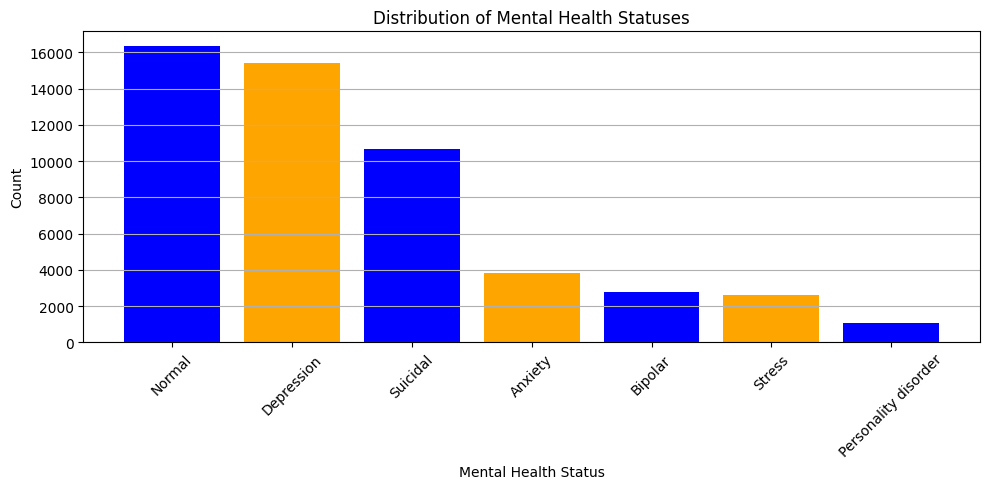

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(status_counts.index, status_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Mental Health Statuses')
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
sample = 1
sample_data = df.groupby('status').apply(lambda x:x.sample(n=sample, random_state=1)).reset_index(drop=True)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/69736349.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = df.groupby('status').apply(lambda x:x.sample(n=sample, random_state=1)).reset_index(drop=True)


In [12]:
for i, row in sample_data.iterrows():
  print("Status:" , row['status'], "\nStatement:", row['statement'],"\n")

Status: Anxiety 
Statement: restive = restless, restless 

Status: Bipolar 
Statement: They They don’t like me when I’m depressed, they don’t like me when I’m manic
Why does the way I act put everyone in a panic
Fuck, this is the way that I am
They just wanna medicate and slaughter the lamb

I’m a pure soul
My rhymes got that sick flow
What you fronting for
Mood like a revolving door

And I don’t even care
Used to smoke blunts and blow it in the air
But they don’t like that either
Had to give up the weed and the ether

So here I am numb just the way you like me
Won’t scare anyone won’t just do it like Nike
So I’ll go through the motions
Although they still have their notions

Thought I would ride til I die
In my dreams I can still fly
Anything to feel alive
But they took away my keys so I can’t drive

So I guess I’ll express myself as a poet
I’m still the shit don’t care if you know it
Just another face in the crowd 
Hide me away in a shroud 

Status: Depression 
Statement: ive been st

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


False

In [15]:
import nltk
# nltk.download()

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
def count_words(s):
    if isinstance(s, str):
        words = nltk.tokenize.word_tokenize(s, language='english', preserve_line=False)
        return len(words)
    return 0  

def count_sentences(s):
    if isinstance(s, str):
        sentences = sent_tokenize(s)
        return len(sentences) 
    return 0 

In [17]:
df['num_words'] = df['statement'].apply(count_words)
df['num_sentences'] = df['statement'].apply(count_sentences)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/179206705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['statement'].apply(count_words)
/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/179206705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['statement'].apply(count_sentences)


In [18]:
df

,statement,status,num_words,num_sentences
0,oh my gosh,Anxiety,3,1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2
3,I've shifted my focus to something else but I'...,Anxiety,13,1
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2
...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6


In [19]:
import seaborn as sns

In [20]:
word_counts = df.groupby('status')['num_words'].mean().reset_index()

In [21]:
word_counts

,status,num_words
0,Anxiety,167.179380
1,Bipolar,206.146921
2,Depression,182.698650
3,Normal,19.879826
4,Personality disorder,209.688022
5,Stress,133.441051
6,Suicidal,161.791682


/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/2392064068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_counts, x='status', y='num_words', palette='viridis')


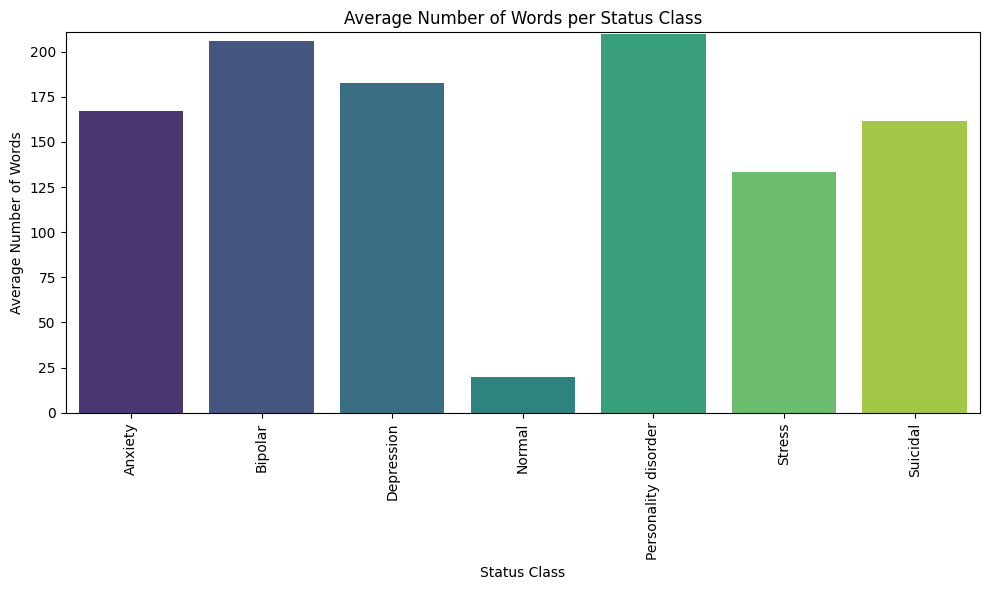

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=word_counts, x='status', y='num_words', palette='viridis')

plt.title('Average Number of Words per Status Class')
plt.xlabel('Status Class')
plt.ylabel('Average Number of Words')
plt.xticks(rotation=90)
plt.ylim(0, word_counts['num_words'].max() + 1)

plt.tight_layout()
plt.show()

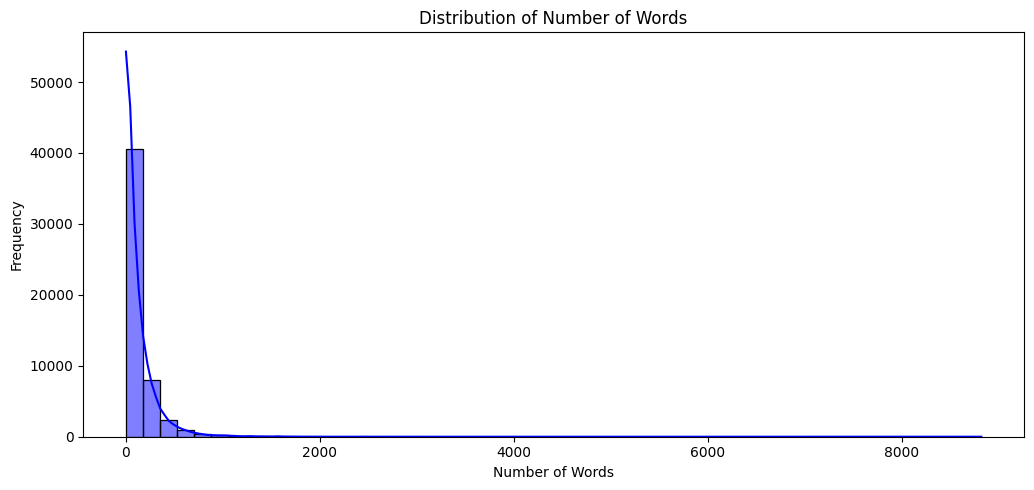

In [23]:
plt.figure(figsize=(20, 5))

# Histogram for number of words
plt.subplot(1, 2, 1)
sns.histplot(df['num_words'], bins=50, kde=True, color='blue')
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')


# Show the plot
plt.tight_layout()
plt.show()

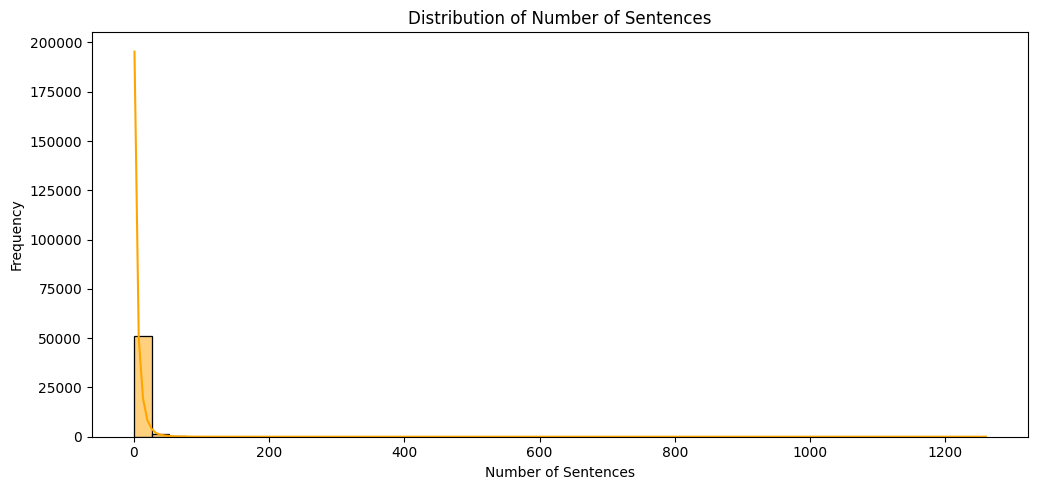

In [24]:
plt.figure(figsize=(20, 5))
# Histogram for number of sentences
plt.subplot(1, 2, 2)
sns.histplot(df['num_sentences'], bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
# pip install plotly

In [26]:
# pip install nbformat


In [28]:
import plotly.express as px

fig = px.histogram(df, x='num_words', nbins=50, title='Distribution of Number of Words', 
                   color_discrete_sequence=['blue'], 
                   labels={'num_words': 'Number of Words', 'count': 'Frequency'})

fig.update_layout(xaxis_title='Number of Words', yaxis_title='Frequency')
fig.show()



In [29]:
fig2 = px.histogram(df, x='num_sentences', nbins=50, title='Distribution of Number of Sentences',
                    color_discrete_sequence=['orange'], 
                    labels={'num_sentences': 'Number of Sentences', 'count': 'Frequency'})

fig2.update_layout(xaxis_title='Number of Sentences', yaxis_title='Frequency')
fig2.show()

In [30]:
df["num_sentences"].sort_values(ascending=False)

13293    1260
46660     430
51396     374
13294     300
10834     237
         ... 
38347       1
38346       1
38345       1
38344       1
0           1
Name: num_sentences, Length: 52681, dtype: int64

In [34]:
df['num_words'].sort_values(ascending=False)

13293    8820
51396    6153
10834    5612
46660    5565
39752    4239
         ... 
5919        1
1065        1
5903        1
4233        1
39638       1
Name: num_words, Length: 52681, dtype: int64

In [35]:
import re
df_unicode = df.copy()

In [36]:
df_unicode

,statement,status,num_words,num_sentences
0,oh my gosh,Anxiety,3,1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2
3,I've shifted my focus to something else but I'...,Anxiety,13,1
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2
...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6


In [37]:
def contains_unicode(s):
    if isinstance(s, str):
        return bool(re.search(r'[^\x00-\x7F]', s))
    return False 

df_unicode['contains_unicode'] = df_unicode['statement'].apply(contains_unicode)
df_unicode["contains_unicode"].value_counts()

contains_unicode
False    46826
True      5855
Name: count, dtype: int64

In [38]:
df_unicode

,statement,status,num_words,num_sentences,contains_unicode
0,oh my gosh,Anxiety,3,1,False
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,False
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,False
3,I've shifted my focus to something else but I'...,Anxiety,13,1,False
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,False
...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,True
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,False
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,False
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,True


In [39]:
unicode_messages = df_unicode[df_unicode['contains_unicode']]

print("Messages with Unicode characters:")

Messages with Unicode characters:


In [41]:
cnt = 0
for i, row in unicode_messages.iterrows():
    cnt+=1
    print(f"Index {i}: {row['statement']}")
    if cnt==5:
        break

Index 15: Every time I wake up, I'm definitely nervous and excited, until when are you going to try ™‚
Index 42: Did you ever read it when you read it to RL, I mean the atmosphere, the taste. It's because I'm like this. when I read au, the topic was about mental illness ™ my days became restless....and now I'm scared.
Index 45: Oh no I'm restless. The time will come. I walk with Jesus. Then my heart is calm.. Every time I sing a song I don't know, tomorrow in this section I always want to cry . Because I sing it but I don't do it . Sorry God I worry too much ️
Index 51: Let's not be nervous, how about ™‚
Index 59: feelings of restlessness have started to appear ±


In [42]:
def remove_unicode(s):
    if isinstance(s, str):
        return re.sub(r'[^\x00-\x7F]+', '', s)
    return s

df['cleaned_statement'] = df['statement'].apply(remove_unicode)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/428437135.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df

,statement,status,num_words,num_sentences,cleaned_statement
0,oh my gosh,Anxiety,3,1,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,"All wrong, back off dear, forward doubt. Stay ..."
3,I've shifted my focus to something else but I'...,Anxiety,13,1,I've shifted my focus to something else but I'...
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,"I'm restless and restless, it's been a month n..."
...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,Nobody takes me seriously Ive (24M) dealt with...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,"selfishness ""I don't feel very good, it's lik..."
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,Is there any way to sleep better? I can't slee...
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,"Public speaking tips? Hi, all. I have to give ..."


In [44]:
df_unicode = df.copy()
df_unicode['contains_unicode'] = df_unicode['cleaned_statement'].apply(contains_unicode)
df_unicode["contains_unicode"].value_counts()

contains_unicode
False    52681
Name: count, dtype: int64

In [45]:
def clean_text(s):
    """Clean the input text by removing URLs, markdown links, mentions, and punctuation."""
    if isinstance(s, str):
        s = re.sub(r"http[s]?://\S+", "", s)
        s = re.sub(r"\[.*?\]\(.*?\)", "", s)
        s = re.sub(r"@\w+", "", s)  
        s = re.sub(r"[^\w\s]", "", s)
        s = s.strip() 
        return s
    return s

df['cleaned_statement'] = df['cleaned_statement'].apply(clean_text)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/1700918466.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df

,statement,status,num_words,num_sentences,cleaned_statement
0,oh my gosh,Anxiety,3,1,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,All wrong back off dear forward doubt Stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,13,1,Ive shifted my focus to something else but Im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,Im restless and restless its been a month now ...
...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,Nobody takes me seriously Ive 24M dealt with d...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness I dont feel very good its like I ...
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,Is there any way to sleep better I cant sleep ...
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,Public speaking tips Hi all I have to give a p...


In [47]:
def remove_age_gender_pattern(statement):
    """Remove age and gender patterns (like '24M' or '30F') from the statement."""
    if not isinstance(statement, str):
        return statement
    pattern = r'\b\d{1,3}[MF]\b'
    cleaned_statement = re.sub(pattern, '', statement)
    return cleaned_statement.strip()

df['cleaned_statement'] = df['cleaned_statement'].apply(remove_age_gender_pattern)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/3539809058.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df

,statement,status,num_words,num_sentences,cleaned_statement
0,oh my gosh,Anxiety,3,1,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,All wrong back off dear forward doubt Stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,13,1,Ive shifted my focus to something else but Im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,Im restless and restless its been a month now ...
...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,Nobody takes me seriously Ive dealt with depr...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness I dont feel very good its like I ...
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,Is there any way to sleep better I cant sleep ...
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,Public speaking tips Hi all I have to give a p...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   statement          52681 non-null  object
 1   status             52681 non-null  object
 2   num_words          52681 non-null  int64 
 3   num_sentences      52681 non-null  int64 
 4   cleaned_statement  52681 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [50]:
def limit_statement_length(statement, max_length=500):
    if not isinstance(statement, str):
        return statement
    words = statement.split()
    return ' '.join(words[:max_length])

df['limited_statement'] = df['cleaned_statement'].apply(limit_statement_length)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/972530690.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df

,statement,status,num_words,num_sentences,cleaned_statement,limited_statement
0,oh my gosh,Anxiety,3,1,oh my gosh,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,All wrong back off dear forward doubt Stay in ...,All wrong back off dear forward doubt Stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,13,1,Ive shifted my focus to something else but Im ...,Ive shifted my focus to something else but Im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,Im restless and restless its been a month now ...,Im restless and restless its been a month now ...
...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,Nobody takes me seriously Ive dealt with depr...,Nobody takes me seriously Ive dealt with depre...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness I dont feel very good its like I ...,selfishness I dont feel very good its like I d...
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,Is there any way to sleep better I cant sleep ...,Is there any way to sleep better I cant sleep ...
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,Public speaking tips Hi all I have to give a p...,Public speaking tips Hi all I have to give a p...


In [52]:
df_test = df.copy()
df_test['num_words'] = df_test['limited_statement'].apply(count_words)
df_test['num_sentences'] = df_test['limited_statement'].apply(count_sentences)

In [53]:
import plotly.express as px
# Create histograms using Plotly
fig = px.histogram(df_test, x='num_words', nbins=50, title='Distribution of Number of Words', 
                   color_discrete_sequence=['blue'], 
                   labels={'num_words': 'Number of Words', 'count': 'Frequency'})

fig.update_layout(xaxis_title='Number of Words', yaxis_title='Frequency')
fig.show()

In [54]:
df["cleaned_statement"] = df["cleaned_statement"].str.lower()

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/2677268079.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df

,statement,status,num_words,num_sentences,cleaned_statement,limited_statement
0,oh my gosh,Anxiety,3,1,oh my gosh,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,all wrong back off dear forward doubt stay in ...,All wrong back off dear forward doubt Stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,13,1,ive shifted my focus to something else but im ...,Ive shifted my focus to something else but Im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,im restless and restless its been a month now ...,Im restless and restless its been a month now ...
...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,nobody takes me seriously ive dealt with depr...,Nobody takes me seriously Ive dealt with depre...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness i dont feel very good its like i ...,selfishness I dont feel very good its like I d...
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,is there any way to sleep better i cant sleep ...,Is there any way to sleep better I cant sleep ...
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,public speaking tips hi all i have to give a p...,Public speaking tips Hi all I have to give a p...


In [56]:
df["tokens"] = df["cleaned_statement"].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/2905632801.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df

,statement,status,num_words,num_sentences,cleaned_statement,limited_statement,tokens
0,oh my gosh,Anxiety,3,1,oh my gosh,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,all wrong back off dear forward doubt stay in ...,All wrong back off dear forward doubt Stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,Anxiety,13,1,ive shifted my focus to something else but im ...,Ive shifted my focus to something else but Im ...,"[ive, shifted, my, focus, to, something, else,..."
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,im restless and restless its been a month now ...,Im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."
...,...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,nobody takes me seriously ive dealt with depr...,Nobody takes me seriously Ive dealt with depre...,"[nobody, takes, me, seriously, ive, dealt, wit..."
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness i dont feel very good its like i ...,selfishness I dont feel very good its like I d...,"[selfishness, i, dont, feel, very, good, its, ..."
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,is there any way to sleep better i cant sleep ...,Is there any way to sleep better I cant sleep ...,"[is, there, any, way, to, sleep, better, i, ca..."
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,public speaking tips hi all i have to give a p...,Public speaking tips Hi all I have to give a p...,"[public, speaking, tips, hi, all, i, have, to,..."


In [58]:
df.isna().sum()

statement            0
status               0
num_words            0
num_sentences        0
cleaned_statement    0
limited_statement    0
tokens               0
dtype: int64

In [59]:

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(tokens):
    return " ".join(stemmer.stem(str(token)) for token in tokens)

df["tokens_stemmed"] = df["tokens"].apply(stemming)
df.head()

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/2039288846.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,statement,status,num_words,num_sentences,cleaned_statement,limited_statement,tokens,tokens_stemmed
0,oh my gosh,Anxiety,3,1,oh my gosh,oh my gosh,"[oh, my, gosh]",oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",troubl sleep confus mind restless heart all ou...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,all wrong back off dear forward doubt stay in ...,All wrong back off dear forward doubt Stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...",all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,13,1,ive shifted my focus to something else but im ...,Ive shifted my focus to something else but Im ...,"[ive, shifted, my, focus, to, something, else,...",ive shift my focu to someth els but im still w...
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,im restless and restless its been a month now ...,Im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...",im restless and restless it been a month now b...


In [60]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df["tokens_stemmed"] = df["tokens"].apply(remove_stopwords)

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/655068815.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df

,statement,status,num_words,num_sentences,cleaned_statement,limited_statement,tokens,tokens_stemmed
0,oh my gosh,Anxiety,3,1,oh my gosh,oh my gosh,"[oh, my, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,all wrong back off dear forward doubt stay in ...,All wrong back off dear forward doubt Stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,Anxiety,13,1,ive shifted my focus to something else but im ...,Ive shifted my focus to something else but Im ...,"[ive, shifted, my, focus, to, something, else,...","[ive, shifted, focus, something, else, im, sti..."
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,im restless and restless its been a month now ...,Im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...","[im, restless, restless, month, boy, mean]"
...,...,...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,nobody takes me seriously ive dealt with depr...,Nobody takes me seriously Ive dealt with depre...,"[nobody, takes, me, seriously, ive, dealt, wit...","[nobody, takes, seriously, ive, dealt, depress..."
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness i dont feel very good its like i ...,selfishness I dont feel very good its like I d...,"[selfishness, i, dont, feel, very, good, its, ...","[selfishness, dont, feel, good, like, dont, be..."
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,is there any way to sleep better i cant sleep ...,Is there any way to sleep better I cant sleep ...,"[is, there, any, way, to, sleep, better, i, ca...","[way, sleep, better, cant, sleep, nights, meds..."
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,public speaking tips hi all i have to give a p...,Public speaking tips Hi all I have to give a p...,"[public, speaking, tips, hi, all, i, have, to,...","[public, speaking, tips, hi, give, presentatio..."


In [62]:
df['tokens_stemmed'] = [' '.join(tokens) for tokens in df['tokens_stemmed']]

/var/folders/xz/l46mlrsn47s9vsqd6zyhp5680000gn/T/ipykernel_7418/233414954.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df

,statement,status,num_words,num_sentences,cleaned_statement,limited_statement,tokens,tokens_stemmed
0,oh my gosh,Anxiety,3,1,oh my gosh,oh my gosh,"[oh, my, gosh]",oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,13,2,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,17,2,all wrong back off dear forward doubt stay in ...,All wrong back off dear forward doubt Stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...",wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,13,1,ive shifted my focus to something else but im ...,Ive shifted my focus to something else but Im ...,"[ive, shifted, my, focus, to, something, else,...",ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,20,2,im restless and restless its been a month now ...,Im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...",im restless restless month boy mean
...,...,...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,385,16,nobody takes me seriously ive dealt with depr...,Nobody takes me seriously Ive dealt with depre...,"[nobody, takes, me, seriously, ive, dealt, wit...",nobody takes seriously ive dealt depressionanx...
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,251,12,selfishness i dont feel very good its like i ...,selfishness I dont feel very good its like I d...,"[selfishness, i, dont, feel, very, good, its, ...",selfishness dont feel good like dont belong wo...
53040,Is there any way to sleep better? I can't slee...,Anxiety,22,2,is there any way to sleep better i cant sleep ...,Is there any way to sleep better I cant sleep ...,"[is, there, any, way, to, sleep, better, i, ca...",way sleep better cant sleep nights meds didnt ...
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,94,6,public speaking tips hi all i have to give a p...,Public speaking tips Hi all I have to give a p...,"[public, speaking, tips, hi, all, i, have, to,...",public speaking tips hi give presentation work...


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df['tokens_stemmed']
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One hot encode categorical labels
y_train_encoded = pd.get_dummies(y_train).values
y_test_encoded = pd.get_dummies(y_test).values

In [75]:
y_train_encoded

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [67]:
from tensorflow.keras.layers import TextVectorization
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)

vectorizer.adapt(X_train.values)

X_train_vectorized = vectorizer(X_train.values)
X_test_vectorized = vectorizer(X_test.values)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [68]:
class_weight_dict

{0: np.float64(1.9509304694009815),
 1: np.float64(2.675809523809524),
 2: np.float64(0.4860002767655335),
 3: np.float64(0.46187736314318595),
 4: np.float64(7.16734693877551),
 5: np.float64(2.9354321933551577),
 6: np.float64(0.7088028524336506)}

In [78]:
X_train_vectorized

<tf.Tensor: shape=(42144, 200), dtype=int64, numpy=
array([[   5,  192,    2, ...,    0,    0,    0],
       [  46,  144,  915, ...,    0,    0,    0],
       [  63,  692, 1345, ...,    0,    0,    0],
       ...,
       [  46,   10,   16, ...,    0,    0,    0],
       [ 920,  349,    0, ...,    0,    0,    0],
       [  69,   82, 1956, ...,    0,    0,    0]])>

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
import tensorflow as tf
vocab_size = 20000
embedding_dim = 128
num_classes = y_train_encoded.shape[1]

model_base = Sequential([
    tf.keras.Input(shape=(200,)),
    Embedding(input_dim=20000, output_dim=128),
    LSTM(units=64),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,609,863 (9.96 MB)

 Trainable params: 2,609,863 (9.96 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_base.fit(
    X_train_vectorized, y_train_encoded, 
    validation_data=(X_test_vectorized, y_test_encoded), 
    epochs=50, batch_size=64, 
    class_weight=class_weight_dict)

Epoch 1/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 71s 105ms/step - accuracy: 0.1615 - loss: 1.9528 - val_accuracy: 0.0225 - val_loss: 1.9530
Epoch 2/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 68s 103ms/step - accuracy: 0.1687 - loss: 1.9231 - val_accuracy: 0.3155 - val_loss: 1.9297
Epoch 3/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - accuracy: 0.2218 - loss: 1.9237 - val_accuracy: 0.3456 - val_loss: 1.6927
Epoch 4/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 68s 104ms/step - accuracy: 0.4140 - loss: 1.6367 - val_accuracy: 0.5488 - val_loss: 0.9689
Epoch 5/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - accuracy: 0.5698 - loss: 1.1966 - val_accuracy: 0.5870 - val_loss: 0.9060
Epoch 6/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.6386 - loss: 1.0023 - val_accuracy: 0.6785 - val_loss: 0.8487
Epoch 7/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 76s 115ms/step - accuracy: 0.7246 - loss: 0.7504 - val_accuracy: 0.7228 - val_loss: 0.7633
Epoch 8/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 70s 106ms/step - accuracy: 0.7988 - loss: 0

In [74]:
from sklearn.metrics import classification_report
y_pred = model_base.predict(X_test_vectorized)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)
print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       755
           1       0.76      0.76      0.76       527
           2       0.66      0.63      0.64      3016
           3       0.88      0.88      0.88      3308
           4       0.57      0.62      0.60       237
           5       0.59      0.53      0.56       536
           6       0.58      0.60      0.59      2158

    accuracy                           0.71     10537
   macro avg       0.68      0.68      0.68     10537
weighted avg       0.71      0.71      0.71     10537



In [79]:
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional, BatchNormalization

model_tuned = Sequential([
    tf.keras.Input(shape=(200,)),
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.5),
    BatchNormalization(),
    LSTM(units=32),
    Dropout(0.5),
    Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))  # L2 Regularization
])

model_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tuned.summary()


history = model_tuned.fit(
    X_train_vectorized,
    y_train_encoded,
    validation_data=(X_test_vectorized, y_test_encoded),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,680,167 (10.22 MB)

 Trainable params: 2,679,911 (10.22 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 199s 149ms/step - accuracy: 0.3037 - loss: 1.7415 - val_accuracy: 0.3334 - val_loss: 1.5860
Epoch 2/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 200s 152ms/step - accuracy: 0.4982 - loss: 1.4423 - val_accuracy: 0.4985 - val_loss: 1.4101
Epoch 3/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 207s 157ms/step - accuracy: 0.4996 - loss: 1.4116 - val_accuracy: 0.5422 - val_loss: 1.2613
Epoch 4/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 197s 149ms/step - accuracy: 0.5569 - loss: 1.2373 - val_accuracy: 0.4900 - val_loss: 1.4226
Epoch 5/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 193s 147ms/step - accuracy: 0.5465 - loss: 1.2486 - val_accuracy: 0.5606 - val_loss: 1.1657
Epoch 6/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 203s 154ms/step - accuracy: 0.5810 - loss: 1.1204 - val_accuracy: 0.5746 - val_loss: 1.0265
Epoch 7/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 202s 154ms/step - accuracy: 0.5997 - loss: 0.9819 - val_accuracy: 0.5919 - val_loss: 0.9847
Epoch 8/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 197s 150ms/step - ac

In [81]:
from sklearn.metrics import classification_report
y_pred = model_tuned.predict(X_test_vectorized)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)
print(classification_report(y_test, y_pred))

330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step
              precision    recall  f1-score   support

           0       0.50      0.69      0.58       755
           1       0.77      0.69      0.73       527
           2       0.71      0.69      0.70      3016
           3       0.90      0.91      0.91      3308
           4       0.00      0.00      0.00       237
           5       0.37      0.43      0.40       536
           6       0.67      0.66      0.66      2158

    accuracy                           0.72     10537
   macro avg       0.56      0.58      0.57     10537
weighted avg       0.72      0.72      0.72     10537



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

